# Image

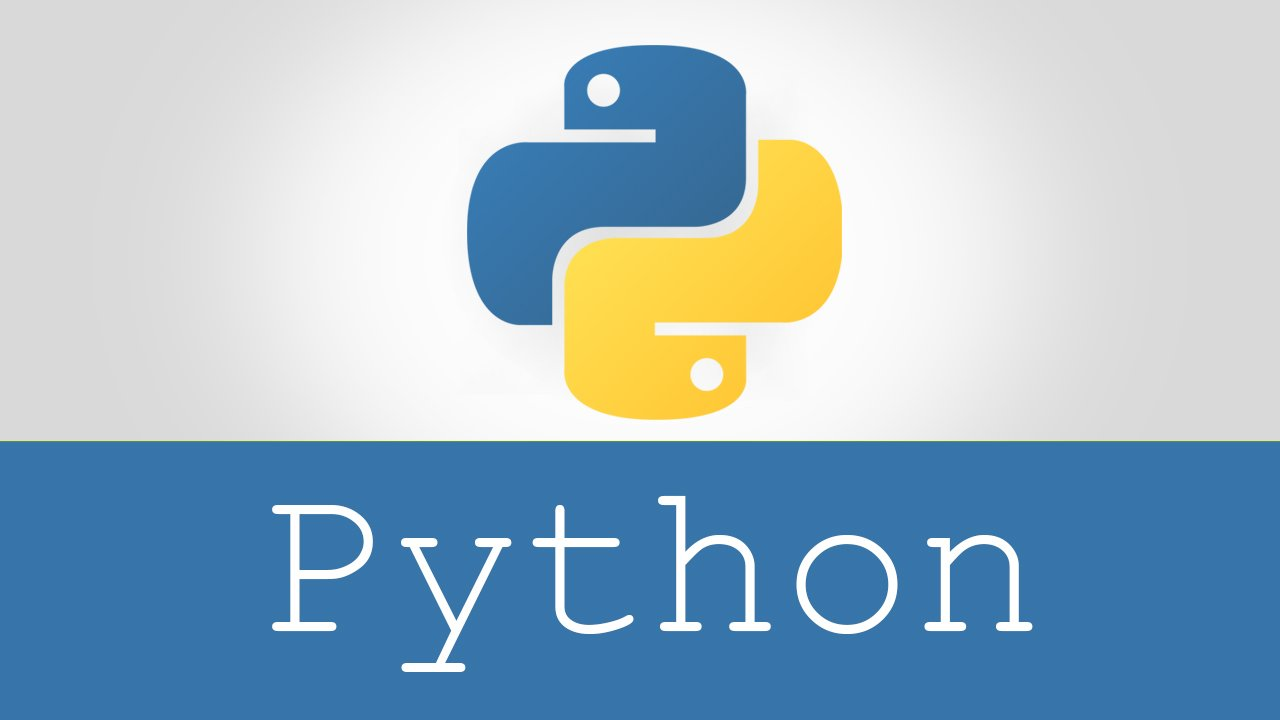

In [7]:
from PIL import Image
Image.open('pythonLogo.jpg')



---
<br/>

# Image Details

In [13]:
print("File Format :" + img.format)
print("Pixel Format :" + img.mode)
print("Image size in pixels :" + str(img.size))
print("Image Palette :" + str(img.palette))

File Format :JPEG
Pixel Format :RGB
Image size in pixels :(1280, 720)
Image Palette :None


---
<br/>

# Mirror Image

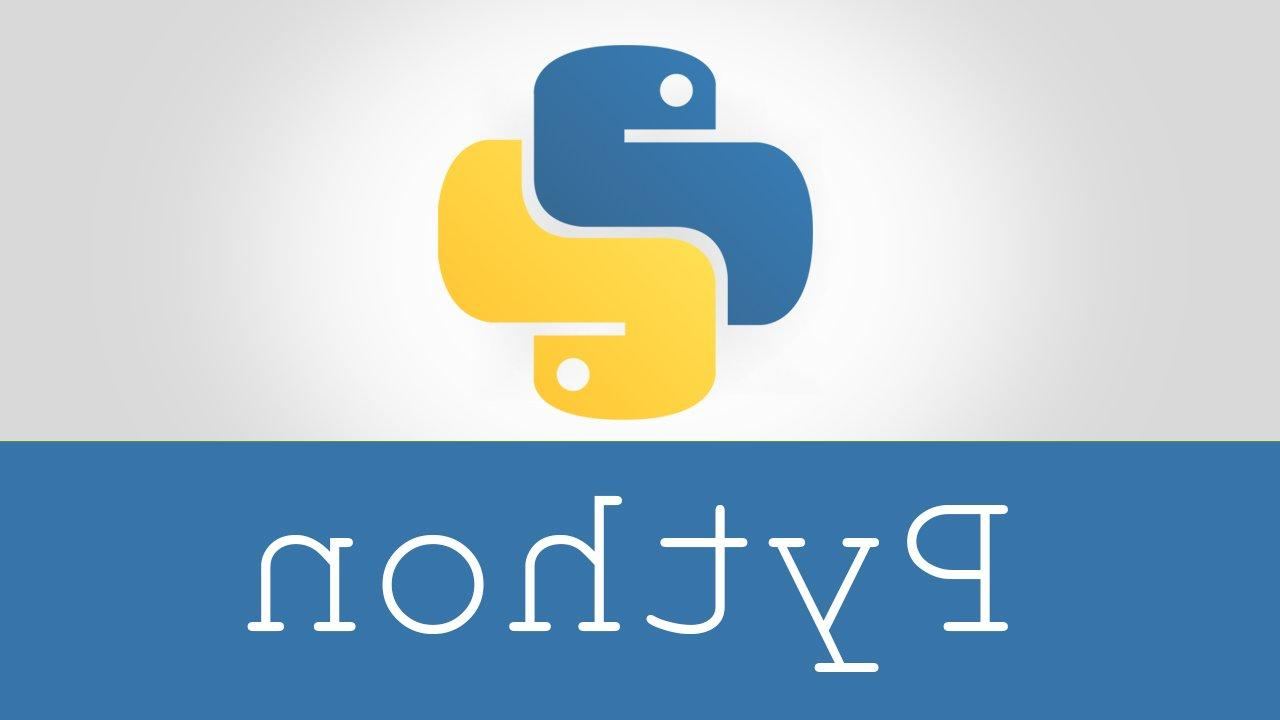

In [12]:
img = Image.open('pythonLogo.jpg')
mirror = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
mirror.save(r'pythonLogoMirror.jpg')
Image.open('pythonLogoMirror.jpg')

---
<br/>

# Image Watermarking

C:\Users\user\AppData\Local\Temp\ipykernel_736\1519085706.py:7: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textWidth, textHeight = draw.textsize(text,font)


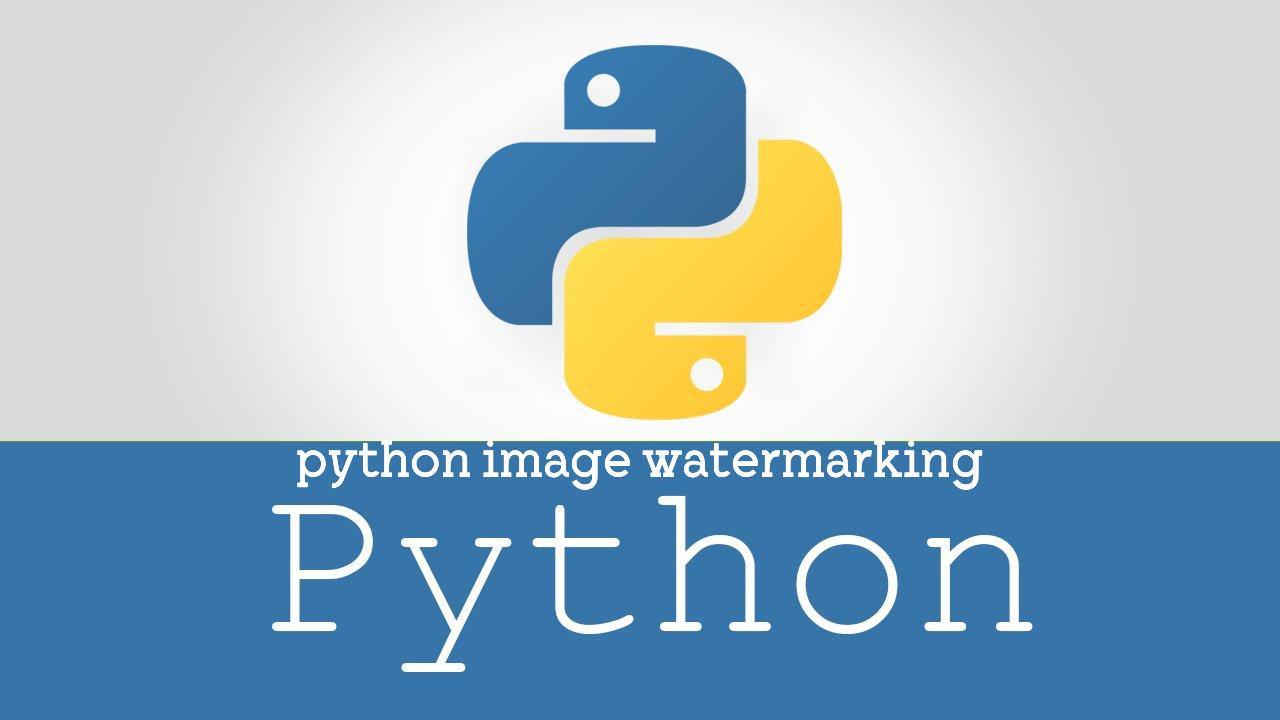

In [18]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(img)

text = "python image watermarking"
font = ImageFont.truetype( 'BrusselsCityPersonalUsed-L3Lon.otf' , 50)
textWidth, textHeight = draw.textsize(text,font)

width, height = img.size

x = width/2 - textWidth/2
y = height - textHeight -230

draw.text((x,y) , text , font=font)

img.save(r'pythonLogoWaterMark.jpg')
Image.open('pythonLogoWaterMark.jpg')

--- 
<br/>

# Image Word Art

In [19]:
import pywhatkit
pywhatkit.image_to_ascii_art('pythonLogo.jpg','pythonLogoArt')
readFile = open("pythonLogoArt.txt" , "r")
print(readFile.read())

!!!!!!!!!!!!!!!!!!!!:::::::::::::::::.......::::::::::::::::!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!:::::::::::::::::.:!******!:.:::::::::::::::!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!::::::::::::::::...*$*$&&&&&@@!.::::::::::::::::!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!::::::::::::::......$@*%@@@@@@&%.::..:::::::::::::!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!:::::::::::::....:!!!%%%%%%@@@@&%::::..:::::::::::::!!!!!!!!!!!!!!
!!!!!!!!!!!!!::::::::::::....:%@@@@@@@@@@@@&&&$:!!!!:..::::::::::::!!!!!!!!!!!!!
!!!!!!!!!!!!!:::::::::::.....%&@@@@@&&&&&&&&&&*!!!!!:...:::::::::::!!!!!!!!!!!!!
!!!!!!!!!!!!!:::::::::::.....$@@@@@@$%%%%%%%%*!!!!!!!...:::::::::::!!!!!!!!!!!!!
!!!!!!!!!!!!::::::::::::.....$&@@&$!!!!!!!!!!!!!!!!!!...::::::::::::!!!!!!!!!!!!
!!!!!!!!!!!!!:::::::::::.....!@&&&%:!!!!!!!!!!!!!!!!:...:::::::::::!!!!!!!!!!!!!
!!!!!!!!!!!!!:::::::::::......!$$@*!!!!!!!!!!!!!!!!:....:::::::::::!!!!!!!!!!!!!
!!!!!!!!!!!!!::::::::::::.......:::!!!!!!!!!!!!::......::::::::::::!!!!!!!!!!!!!
!!!!!!!!!!!!!!:::::::::::::.

---
<br/>

# Image to pencil sketch

In [20]:
import cv2
# from google.colab.patches import cv2_imshow

img1 = cv2.imread('pythonLogo.jpg')
window1 = 'Original Logo'

cv2.imshow(window1,img1)
# cv2_imshow(img1)

grayImg = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grayImg)

blur = cv2.GaussianBlur(invert , (21,21) , 0)
invertedBlur = cv2.bitwise_not(blur)
sketch = cv2.divide(grayImg , invertedBlur , scale=256.0)

cv2.imwrite('pythonLogoSketch.jpg' , sketch)

img2 = cv2.imread('pythonLogoSketch.jpg')
window2 = 'Sketch Logo'

cv2.imshow(window2,img2)
# cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

---
<br/>

# Images to PDF

In [21]:
def imagesPDF(filename , output):
    images= []
    
    for file in filename:
        im = Image.open(file)
        im = im.convert('RGB')
        images.append(im)
        
        images[0].save(output, save_all=True , append_images=images[1:])

imagesPDF(["pythonLogo.jpg" , "pythonLogoMirror.jpg" , "pythonLogoWaterMark.jpg" , "pythonLogoSketch.jpg"] , "output.pdf")

---
<br/>

# Generate captcha from input

Enter captcha text:captcha


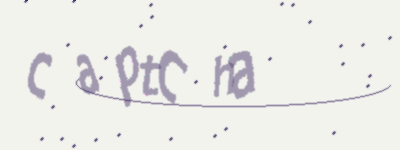

In [29]:
from captcha.image import ImageCaptcha

image = ImageCaptcha(width=400 , height=150)

captchaText = input("Enter captcha text:")

data = image.generate(captchaText)

image.write(captchaText , 'captchaImage.jpg')

Image.open('captchaImage.jpg')

---
<br/>

# Lock your Photos

In [28]:
from cryptography.fernet import Fernet
key = Fernet.generate_key()

with open('key.key' , 'wb') as f:
    f.write(key)

fernet = Fernet(key)

with open('pythonLogo.jpg' , 'rb') as f:
    photo = f.read()

lock = fernet.encrypt(photo)
with open('pythonLogo.jpg' , 'wb') as locked:
    locked.write(lock)